## HW 4 ( 40 points)

Submit your homework as a .ipynb file. Use the format 'HW4_LastName_FirstName.ipynb'. If there are no comments/markdown describing what you have done, your work will not be graded. Follow the code of conduct.

**Problem 1: Logistic Regression (20 points)**

You are given a real life research data of partipants where the impact of certain life habits and individual attributes on the probability of heart disease is studied. 
*   Sex: male or female
*   Age: Age of the patient
*   Cigs Per Day: average number of cigarettes that the person smoked in a day
* Medication: whether or not the patient was on blood pressure medication
* Cholestrol: total cholesterol level
* BP: systolic blood pressure 
* BMI: Body Mass Index 
* Glucose: glucose level 
* 10HDR (ten year Heart disease risk, this is your output variable)

(a) Build a logistic regression model to predict the risk of heart disease <br>

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# Load the data
data = pd.read_csv("heart_disease_risk.csv")

# Fill missing values with the median
data_filled = data.fillna(data.median())

# Define features and target
X = data_filled.drop(columns=["10HDR"])
y = data_filled["10HDR"]

# Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model_all_features = LogisticRegression(max_iter=1000, random_state=42)
model_all_features.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred_all = model_all_features.predict(X_test)
accuracy_all = accuracy_score(y_test, y_pred_all)
report_all = classification_report(y_test, y_pred_all)

print(f"Accuracy: {accuracy_all}")
print("Classification Report:")
print(report_all)


Accuracy: 0.8573113207547169
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       725
           1       0.60      0.05      0.09       123

    accuracy                           0.86       848
   macro avg       0.73      0.52      0.51       848
weighted avg       0.82      0.86      0.80       848



(b) Only select a subset of features i.e blood pressure, cholestrol level, glucose level, BMI, and average cigarettes consumed in a day and build a new model <br>

In [2]:
# Select specific features
selected_features = ["BP", "Cholestrol", "glucose", "BMI", "Average_cigs"]
X_selected = data_filled[selected_features]

# Split into training and test sets (80% train, 20% test)
X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model_selected_features = LogisticRegression(max_iter=1000, random_state=42)
model_selected_features.fit(X_train_sel, y_train_sel)

# Make predictions and evaluate the model
y_pred_sel = model_selected_features.predict(X_test_sel)
accuracy_sel = accuracy_score(y_test_sel, y_pred_sel)
report_sel = classification_report(y_test_sel, y_pred_sel)

print(f"Accuracy with selected features: {accuracy_sel}")
print("Classification Report with selected features:")
print(report_sel)


Accuracy with selected features: 0.8561320754716981
Classification Report with selected features:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       725
           1       0.57      0.03      0.06       123

    accuracy                           0.86       848
   macro avg       0.71      0.51      0.49       848
weighted avg       0.82      0.86      0.80       848



(c) Next, predict the probability of heart disease of an individual with  blood pressure of 140, a BMI of 30,  a cholesterol level of 300 , a glucose level of 120, smoking 10 cigarettes per day <br>

In [3]:
# Define the individual data
individual = pd.DataFrame({
    "BP": [140],
    "Cholestrol": [300],
    "glucose": [120],
    "BMI": [30],
    "Average_cigs": [10]
})

# Predict the probability of heart disease
risk_probability = model_selected_features.predict_proba(individual)[0, 1]  # Probability of heart disease
print(f"Predicted Probability of Heart Disease: {risk_probability:.2%}")


Predicted Probability of Heart Disease: 24.42%


**Problem 2: Class Exercise Submission (20 points)**
Submit the class exercise done in Lecture 8 on implementing gradient descent.  Plot first 10 steps of the gradient descent in the form of the corresponding linear regression lines.

#### (1) Import packages

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.datasets import load_iris
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import add_dummy_feature
from sklearn.linear_model import LinearRegression

Matplotlib is building the font cache; this may take a moment.


#### (2) Generate X, y vectors

In [5]:
# generate X, y vectors
np.random.seed(42)  # to make this code example reproducible
m = 100  # number of instances
X = np.random.rand(m, 1)  # column vector
y =  1+ 2 * X + np.random.randn(m, 1)  # column vector

#### (3) Linear Regression

In [6]:
# Add a constant x0 = 1 to facilitate the intercept calculation ([X] --> [1, X])
X_d = add_dummy_feature(X, value=1.0)

#fit a linear regression model and print the coefficients (look at sklearn documentation)
reg = LinearRegression().fit(X, y)

print(f"intercept: {reg.intercept_[0]}")
print(f"slope: {reg.coef_[0][0]}")


intercept: 1.2150961575467478
slope: 1.5402267728769683


#### (4) Least square

In [7]:
### use least squares way to calculate your best parameters

# Calculate "theta_best" using least squares formula
theta_best = np.linalg.inv(X_d.T.dot(X_d)).dot(X_d.T).dot(y)
# print theta_best
print("theta_best (intercept and slope):", theta_best.ravel())

theta_best (intercept and slope): [1.21509616 1.54022677]


#### (5) Prediction and plot (use linear regression result)

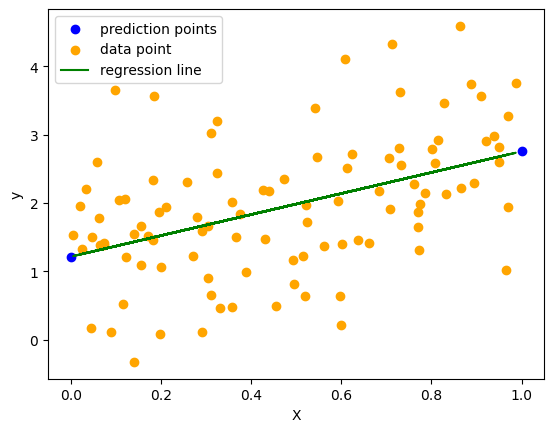

In [8]:
# Create a 2D array for new data (e.g., [[0], [1]])
X_new = np.array ([[0],[1]])

# Make a prediction (using the linear regression model `reg` from before)
predictions = reg.predict(X_new)

# plot the predictions and your data points
y_pred = reg.predict(X)
plt.scatter(X_new, predictions, label='prediction points', color='blue')
plt.scatter(X, y, label='data point', color='orange')
plt.plot(X, y_pred, label='regression line', color='green')
plt.xlabel('X')
plt.ylabel('y')

plt.legend()
plt.show()

#### (6) Gradient descent

In [9]:
# Gradient descent
r = 0.1  # learning rate
n_epochs = 1000
np.random.seed(42)
# randomly initialized model parameters
theta_random = np.array ([[1],[2]])
theta = theta_random


for epoch in range(n_epochs):
    gradients = 2 / X_d.shape[0] * X_d.T.dot(X_d.dot(theta) - y)  # Calculate the gradient
    theta = theta - r * gradients  # renew theta values in each epoch
    # print out the first 10 epoch result as requested
    if epoch < 10:
        print(f"Epoch {epoch+1}: theta = {theta.ravel()}")

#print theta after 100 epochs gradient descent
print("Epoch 100: theta = ", theta.ravel())

Epoch 1: theta = [0.99978393 1.99184181]
Epoch 2: theta = [1.00037824 1.98420759]
Epoch 3: theta = [1.00157157 1.9769888 ]
Epoch 4: theta = [1.00320507 1.97010347]
Epoch 5: theta = [1.00515934 1.9634896 ]
Epoch 6: theta = [1.0073447  1.95710028]
Epoch 7: theta = [1.00969381 1.95089992]
Epoch 8: theta = [1.01215616 1.94486145]
Epoch 9: theta = [1.01469387 1.93896422]
Epoch 10: theta = [1.01727859 1.93319244]
Epoch 100: theta =  [1.21509601 1.54022706]
